In [1]:
%%javascript
(function(on) {
const e=$( "<a>Setup failed</a>" );
const ns="js_jupyter_suppress_warnings";
var cssrules=$("#"+ns);
if(!cssrules.length) cssrules = $("<style id='"+ns+"' type='text/css'>div.output_stderr { } </style>").appendTo("head");
e.click(function() {
    var s='Showing';  
    cssrules.empty()
    if(on) {
        s='Hiding';
        cssrules.append("div.output_stderr, div[data-mime-type*='.stderr'] { display:none; }");
    }
    e.text(s+' warnings (click to toggle)');
    on=!on;
}).click();
$(element).append(e);
})(true);

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

In [3]:
import ar2gas as gas
import pygeostat as gs
import numpy as np
import matplotlib.pyplot as plt
import helpers
from scipy.stats import norm
import proportions
import variogram_on_grid
import pandas as pd

In [4]:
data = gs.DataFile(flname='dataset.csv', x='x', y='y')
data['code'] = data['code'].values.astype(int)
gs.write_gslib(data, flname='sisim/dataset.dat')

C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat

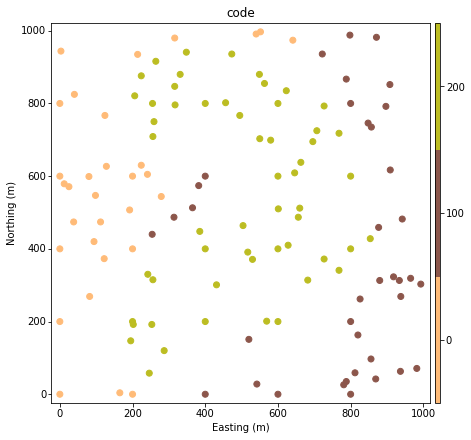

In [5]:
gs.locmap(data, x='x', y='y', figsize=(7,7))

C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat

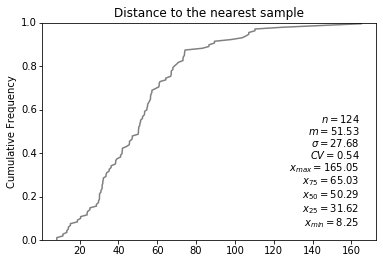

In [6]:
helpers.samples_dist(data.data.x, data.data.y, None)

C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat

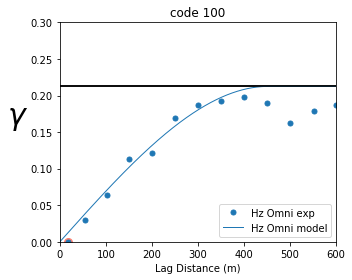

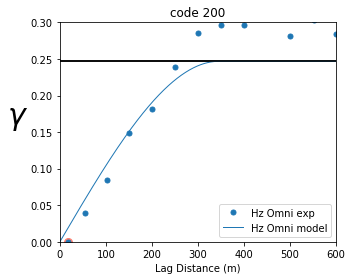

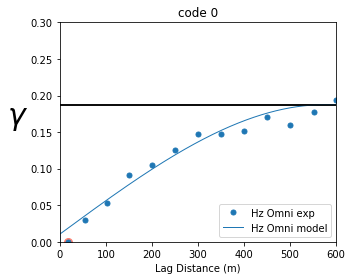

In [7]:
codes = data.data.code.unique()
#fig, axes = plt.subplots(1, 3, figsize=(15,5))
variograms = {}
gsvar = {}
for idx, c in enumerate(codes):
    data['ind_{}'.format(c)] = np.where((data['code'] == c) == True, 1, 0)
    vario = gs.Variogram(data, 'ind_{}'.format(c), ndim=2, ndir=1, omnihz=True, mute=True, warn=False)
    vario.settols(nlags=12, lagdist=50, lagtol=25)
    vario.varcalc()
    vario.fitmodel(sill=np.var(data['ind_{}'.format(c)]))
    #ax = vario.plot(titles='code {}'.format(int(c)), model=True, sill=np.var(data['ind_{}'.format(c)]), ylim=[0.0,0.3], axes=axes[idx], ms=5)
    fig = vario.plot(titles='code {}'.format(int(c)), model=True, sill=np.var(data['ind_{}'.format(c)]), ylim=[0.0,0.3], ms=5, figsize=(5,4))
    variograms['code {}'.format(int(c))] = helpers.gslibvar_to_ar2gasvar(vario.model)
    gsvar['code {}'.format(int(c))] = str(vario.model)
    plt.tight_layout()

In [8]:
a2ggrid, gsgrid = helpers.autogrid(data.data.x, data.data.y, None, 1, 1, 1)

In [9]:
ps = gas.data.PointSet(data.data.x.values, data.data.y.values, np.zeros(len(data.data.y.values)))
anis = gas.data.AnisotropicTransformation(10000, 10000, 10000, 0, 0, 0)
nei = gas.data.KDTree(ps, 1, anis)
sf = gas.data.SearchFilter.no_filter()
est = gas.compute.NNEstimator.KNN(nei, sf, a2ggrid, data.data.code)
target = est.compute(a2ggrid, 0)

In [10]:
sisimpar = '''
                  Parameters for SISIM
                  ********************

START OF PARAMETERS:
0                             -1=continuous(cdf), 0=categorical(pdf)
3                             -number thresholds/categories
0   100   200                 -   thresholds / categories
{p1} {p2} {p3}                -   global cdf / pdf
{file}                        -file with data
1   2   0   3                 -   columns for X,Y,Z, and variable
direct.ik                     -file with soft indicator input
1   2   0   3 4 5 6 7         -   columns for X,Y,Z, and indicators
0                             -   Markov-Bayes simulation (0=no,1=yes)
0.61  0.54  0.56  0.53  0.29  -      calibration B(z) values
-1.0e21    1.0e21             -trimming limits
0      1                    -minimum and maximum data value
1      0.0                    -   lower tail option and parameter
1      1.0                    -   middle     option and parameter
1      1                    -   upper tail option and parameter
cluster.dat                   -   file with tabulated values
3   0                         -      columns for variable, weight
0                             -debugging level: 0,1,2,3
sisim/sisim.dbg                     -file for debugging output
sisim/sisim.out                     -file for simulation output
10                             -number of realizations
{griddef}
162117                         -random number seed
24                            -maximum original data  for each kriging
12                            -maximum previous nodes for each kriging
1                             -maximum soft indicator nodes for kriging
1                             -assign data to nodes? (0=no,1=yes)
0     3                       -multiple grid search? (0=no,1=yes),num
0                             -maximum per octant    (0=not used)
500.0  500.0  500.0                 -maximum search radii
 0.0   0.0   0.0              -angles for search ellipsoid
51    51    11                -size of covariance lookup table
0    2.5                      -0=full IK, 1=median approx. (cutoff)
1                             -0=SK, 1=OK
{v1}
{v2}
{v3}
'''

p1 = sum(target == 0)/len(target)
p2 = sum(target == 100)/len(target)
p3 = sum(target == 200)/len(target)


sisimpars = {
    'p1':p1,
    'p2':p2,
    'p3':p3,
    'griddef':gsgrid,
    'file':'sisim/dataset.dat',
    'v1':gsvar['code 0'],
    'v2':gsvar['code 100'],
    'v3':gsvar['code 200'],
}

sisim = gs.Program(program='sisim/sisim', parfile='sisim/sisim.par')

sisim.run(parstr=sisimpar.format(**sisimpars))

Calling:  ['sisim/sisim', 'sisim/sisim.par']

 SISIM Version: 3.000

  variable type (1=continuous, 0=categorical)=            0
  number of thresholds / categories =            3
  thresholds / categories =   0.0000000E+00   100.0000       200.0000    
  global cdf / pdf        =   0.2206304      0.3162986      0.4630710    
  data file = sisim/dataset.dat                       
  input columns =            1           2           0           3
  soft data file = direct.ik                               
  trimming limits       -1.0000000E+21  1.0000000E+21
  data limits (tails)    0.0000000E+00   1.000000    
  lower tail =            1  0.0000000E+00
  middle =            1   1.000000    
  upper tail =            1   1.000000    
  file for tab. quant. cluster.dat                             
  columns for vr wt =            3           0
  debugging level =            0
  debugging file = sisim/sisim.dbg                         
  output file = sisim/sisim.out                      

   currently on node    820000
   currently on node    830000
   currently on node    840000
   currently on node    850000
   currently on node    860000
   currently on node    870000
   currently on node    880000
   currently on node    890000
   currently on node    900000
   currently on node    910000
   currently on node    920000
   currently on node    930000
   currently on node    940000
   currently on node    950000
   currently on node    960000
   currently on node    970000
   currently on node    980000
   currently on node    990000

 Finished simulation  2
     threshold   1 input cdf = 0.2206 realization cdf = 0.2801
     threshold   2 input cdf = 0.3163 realization cdf = 0.2691
     threshold   3 input cdf = 0.4631 realization cdf = 0.4508

 Summary of order relations: 
     threshold 1 number = 212961 average =   0.0717 maximum =   0.6861
     threshold 2 number = 186829 average =   0.0383 maximum =   0.4877
     threshold 3 number = 250384 average =   0.0479 max

  Working on realization number:            5
   currently on node     10000
   currently on node     20000
   currently on node     30000
   currently on node     40000
   currently on node     50000
   currently on node     60000
   currently on node     70000
   currently on node     80000
   currently on node     90000
   currently on node    100000
   currently on node    110000
   currently on node    120000
   currently on node    130000
   currently on node    140000
   currently on node    150000
   currently on node    160000
   currently on node    170000
   currently on node    180000
   currently on node    190000
   currently on node    200000
   currently on node    210000
   currently on node    220000
   currently on node    230000
   currently on node    240000
   currently on node    250000
   currently on node    260000
   currently on node    270000
   currently on node    280000
   currently on node    290000
   currently on node    300000
   currently on node    

   currently on node    320000
   currently on node    330000
   currently on node    340000
   currently on node    350000
   currently on node    360000
   currently on node    370000
   currently on node    380000
   currently on node    390000
   currently on node    400000
   currently on node    410000
   currently on node    420000
   currently on node    430000
   currently on node    440000
   currently on node    450000
   currently on node    460000
   currently on node    470000
   currently on node    480000
   currently on node    490000
   currently on node    500000
   currently on node    510000
   currently on node    520000
   currently on node    530000
   currently on node    540000
   currently on node    550000
   currently on node    560000
   currently on node    570000
   currently on node    580000
   currently on node    590000
   currently on node    600000
   currently on node    610000
   currently on node    620000
   currently on node    630000
   curre

   currently on node    650000
   currently on node    660000
   currently on node    670000
   currently on node    680000
   currently on node    690000
   currently on node    700000
   currently on node    710000
   currently on node    720000
   currently on node    730000
   currently on node    740000
   currently on node    750000
   currently on node    760000
   currently on node    770000
   currently on node    780000
   currently on node    790000
   currently on node    800000
   currently on node    810000
   currently on node    820000
   currently on node    830000
   currently on node    840000
   currently on node    850000
   currently on node    860000
   currently on node    870000
   currently on node    880000
   currently on node    890000
   currently on node    900000
   currently on node    910000
   currently on node    920000
   currently on node    930000
   currently on node    940000
   currently on node    950000
   currently on node    960000
   curre

In [11]:
real = gs.DataFile('sisim/sisim.out', null=-99)
reals = pd.DataFrame()
for i in range(10):
    reals['real {}'.format(i)] = real.data.iloc[(a2ggrid.size() * i) : (a2ggrid.size() * (i + 1))]['Simulated Value'].values

In [12]:
reals.head()

,real 0,real 1,real 2,real 3,real 4,real 5,real 6,real 7,real 8,real 9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,200.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,200.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,200.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat

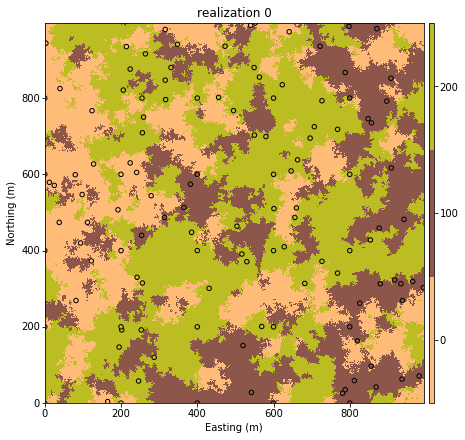

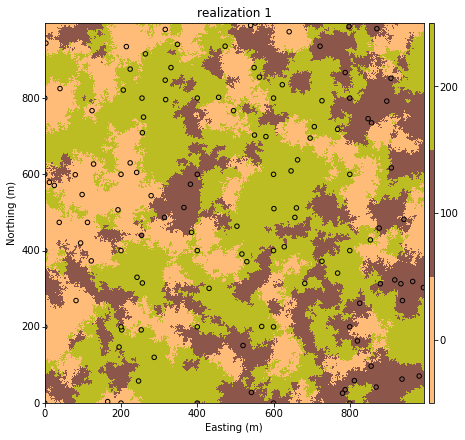

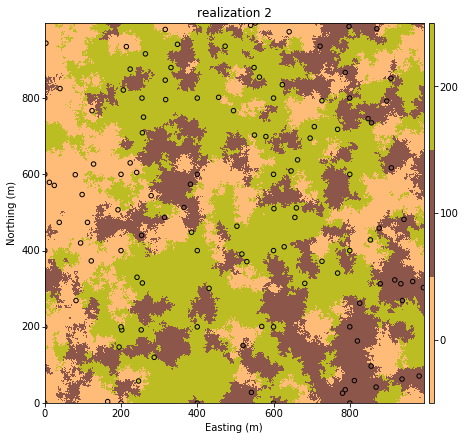

In [13]:
for i in range(0,3):
    gs.pixelplt(np.array(reals['real {}'.format(i)]), gsgrid, title='realization {}'.format(i), figsize = (7,7), pointdata=data, pointvar='code', pointkws={'marker':'o', 's':20, 'edgecolors': 'k'})

In [14]:
#gs.pixelplt(target, gsgrid, title='NN', figsize = (7,7), pointdata=data, pointvar='code', pointkws={'marker':'o', 's':20, 'edgecolors': 'k'})

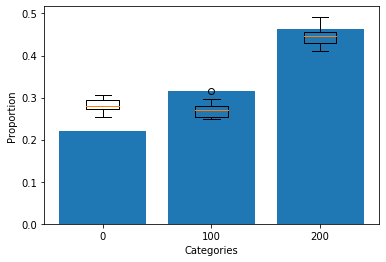

In [15]:
proportions.cat_plot(target, [reals['real {}'.format(i)].values for i in range(10)], weights=None)

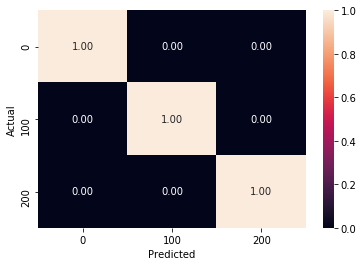

In [16]:
proportions.back_flag(a2ggrid, [reals['real {}'.format(i)].values for i in range(10)], data.data.x, data.data.y, None, data.data.code)

In [17]:
ind_reals = helpers.reals_to_indicators([reals['real {}'.format(i)].values for i in range(10)])

Calculating experimental variograms for step 100
Calculating experimental variograms for step 200
Calculating experimental variograms for step 300
Calculating experimental variograms for step 400
Calculating experimental variograms for step 500


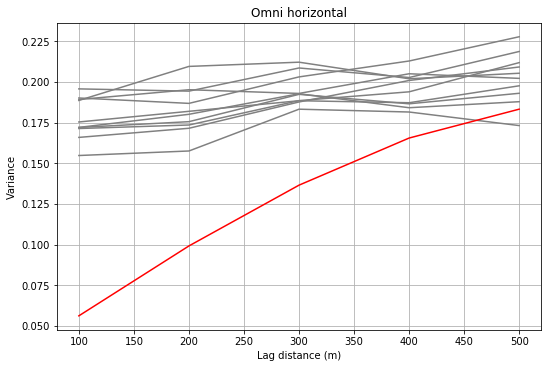

In [18]:
vargrid = variogram_on_grid.Variogram_on_Grid(a2ggrid.dim()[0], a2ggrid.dim()[1], a2ggrid.dim()[2], ind_reals['ind_0.0'], 5, 100)
vargrid.calculate()
vargrid.plot(1, 1, variograms['code 0'])

Calculating experimental variograms for step 100
Calculating experimental variograms for step 200
Calculating experimental variograms for step 300
Calculating experimental variograms for step 400
Calculating experimental variograms for step 500


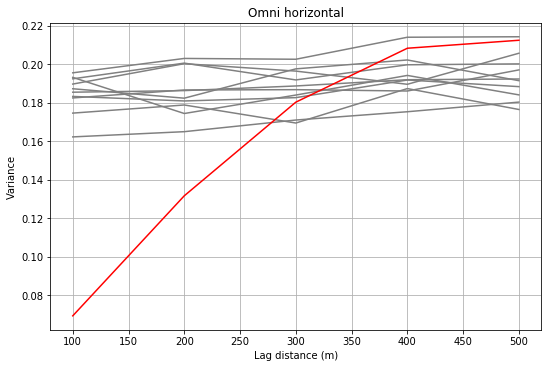

In [19]:
vargrid = variogram_on_grid.Variogram_on_Grid(a2ggrid.dim()[0], a2ggrid.dim()[1], a2ggrid.dim()[2], ind_reals['ind_100.0'], 5, 100)
vargrid.calculate()
vargrid.plot(1, 1, variograms['code 100'])

Calculating experimental variograms for step 100
Calculating experimental variograms for step 200
Calculating experimental variograms for step 300
Calculating experimental variograms for step 400
Calculating experimental variograms for step 500


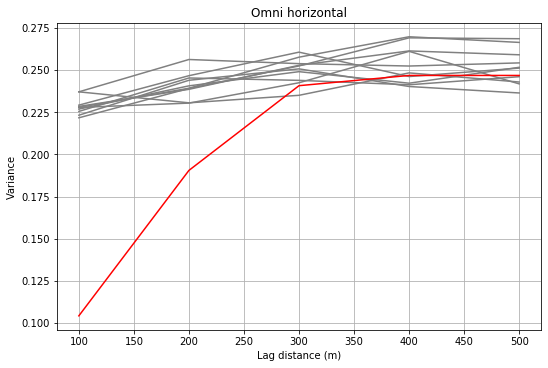

In [20]:
vargrid = variogram_on_grid.Variogram_on_Grid(a2ggrid.dim()[0], a2ggrid.dim()[1], a2ggrid.dim()[2], ind_reals['ind_200.0'], 5, 100)
vargrid.calculate()
vargrid.plot(1, 1, variograms['code 200'])